Acurácia no conjunto de validação: 99.17%
Padrão 1 ([0 0 0]) com ruído: [-0.08391915  0.07816145  0.05130388]
Classificação: [ 1 -1 -1 -1 -1 -1 -1 -1]
Resposta Esperada: [ 1. -1. -1. -1. -1. -1. -1. -1.]

Padrão 2 ([0 0 1]) com ruído: [-0.00277524  0.01992744  0.97375206]
Classificação: [-1  1 -1 -1 -1 -1 -1 -1]
Resposta Esperada: [-1.  1. -1. -1. -1. -1. -1. -1.]

Padrão 3 ([0 1 0]) com ruído: [ 0.01482086  1.01334313 -0.02144597]
Classificação: [-1 -1  1 -1 -1 -1 -1 -1]
Resposta Esperada: [-1. -1.  1. -1. -1. -1. -1. -1.]

Padrão 4 ([0 1 1]) com ruído: [-0.07172659  1.07892817  1.02446814]
Classificação: [-1 -1 -1  1 -1 -1 -1 -1]
Resposta Esperada: [-1. -1. -1.  1. -1. -1. -1. -1.]

Padrão 5 ([1 0 0]) com ruído: [1.07976683 0.05154533 0.0659217 ]
Classificação: [-1 -1 -1 -1  1 -1 -1 -1]
Resposta Esperada: [-1. -1. -1. -1.  1. -1. -1. -1.]

Padrão 6 ([1 0 1]) com ruído: [ 0.93750408 -0.02764587  1.05701036]
Classificação: [-1 -1 -1 -1 -1  1 -1 -1]
Resposta Esperada: [-1. -1. -1. -1. -

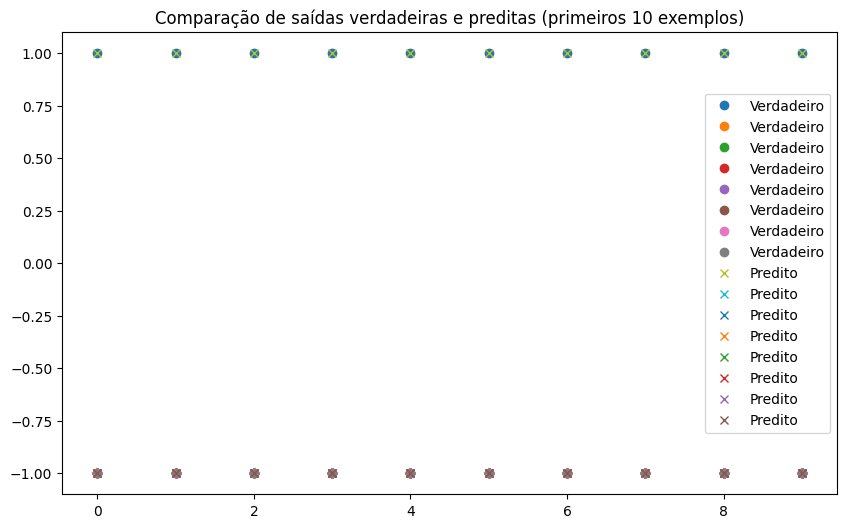

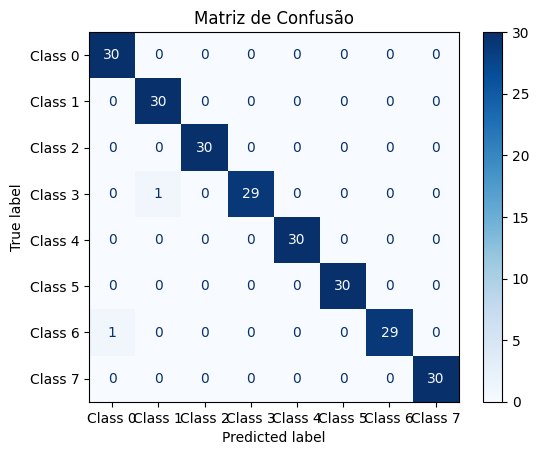

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Definindo os padrões e vetores de resposta
patterns = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

responses = np.array([
    [ 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
    [-1.0,  1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
    [-1.0, -1.0,  1.0, -1.0, -1.0, -1.0, -1.0, -1.0],
    [-1.0, -1.0, -1.0,  1.0, -1.0, -1.0, -1.0, -1.0],
    [-1.0, -1.0, -1.0, -1.0,  1.0, -1.0, -1.0, -1.0],
    [-1.0, -1.0, -1.0, -1.0, -1.0,  1.0, -1.0, -1.0],
    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0,  1.0, -1.0],
    [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0,  1.0]
])

# Função para gerar dados com ruído
def generate_noisy_data(patterns, responses, num_samples=1000, noise_level=0.1):
    data = []
    labels = []
    for i in range(len(patterns)):
        for _ in range(num_samples):
            noisy_pattern = patterns[i] + np.random.uniform(-noise_level, noise_level, patterns[i].shape)
            data.append(noisy_pattern)
            labels.append(responses[i])
    return np.array(data), np.array(labels)

# Gerando o conjunto de treinamento e validação
train_data, train_labels = generate_noisy_data(patterns, responses, num_samples=100)
val_data, val_labels = generate_noisy_data(patterns, responses, num_samples=30)

# Função de ativação do Perceptron
def activation(x):
    return np.where(x >= 0, 1, -1)

# Classe do Perceptron de camada única
class Perceptron:
    def __init__(self, input_size, output_size, learning_rate=0.01):
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.zeros(output_size)
        self.learning_rate = learning_rate

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                net_input = np.dot(X[i], self.weights) + self.bias
                output = activation(net_input)
                error = y[i] - output
                self.weights += self.learning_rate * np.outer(X[i], error)
                self.bias += self.learning_rate * error

    def predict(self, X):
        net_input = np.dot(X, self.weights) + self.bias
        return activation(net_input)

# Treinando o Perceptron
input_size = train_data.shape[1]
output_size = train_labels.shape[1]
perceptron = Perceptron(input_size, output_size, learning_rate=0.01)
perceptron.train(train_data, train_labels, epochs=1000)

# Avaliando o Perceptron no conjunto de validação
predictions = perceptron.predict(val_data)
accuracy = np.mean(np.all(predictions == val_labels, axis=1))
print(f'Acurácia no conjunto de validação: {accuracy * 100:.2f}%')

# Função para classificar um padrão com ruído usando o perceptron treinado
def classificar(padrao, pesos, bias):
    net_input = np.dot(padrao, pesos) + bias
    return activation(net_input)

# Gerando padrões com ruído para teste
padrões_com_ruído = patterns + np.random.uniform(-0.1, 0.1, patterns.shape)

# Testando o Perceptron
for i, padrão in enumerate(patterns):
    padrão_com_ruído = padrões_com_ruído[i]
    classificação = classificar(padrão_com_ruído, perceptron.weights, perceptron.bias)
    print(f"Padrão {i+1} ({padrão}) com ruído: {padrão_com_ruído}")
    print(f"Classificação: {classificação}")
    print(f"Resposta Esperada: {responses[i]}")
    print()

# Exibindo os pesos finais
print("Pesos finais:")
print(perceptron.weights)
print("Bias final:")
print(perceptron.bias)

# Plotando alguns resultados
plt.figure(figsize=(10, 6))
plt.plot(val_labels[:10], 'o', label='Verdadeiro')
plt.plot(predictions[:10], 'x', label='Predito')
plt.legend()
plt.title("Comparação de saídas verdadeiras e preditas (primeiros 10 exemplos)")
plt.show()

# Transformando previsões e rótulos de validação em classes únicas para a matriz de confusão
val_labels_flat = np.argmax(val_labels, axis=1)
predictions_flat = np.argmax(predictions, axis=1)

# Plotando a matriz de confusão
cm = confusion_matrix(val_labels_flat, predictions_flat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Class {i}' for i in range(output_size)])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()
